In [1]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import losses


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

print(tf.__version__)

2.0.0


In [2]:
# Load training data saved locally
path = 'data/'
filename = 'named_train.csv'
df = pd.read_csv(path+filename)

In [3]:
# Sample view
df.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Delineate labeled output and sample pixels in training data
X_train = df.iloc[:,1:]
y_train = df.iloc[:,0]

In [5]:
X_train.shape

(112800, 784)

In [6]:
len(y_train)

112800

In [7]:
# Values are int64, which need to be converted to float for CNN model
X_train = X_train.astype(np.float32)

In [8]:
# Convert training images to 2D 28x28 image, greyscale
X_train = X_train.values.reshape(-1,28,28,1)

In [9]:
X_train.shape

(112800, 28, 28, 1)

In [10]:
# Rename to train_images for clarity
train_images = X_train

In [11]:
train_images[112799]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [12]:
# Extracted training labels from Pandas dataframe need to be converted to numpy array as input for the model
train_labels=y_train.to_numpy()

In [13]:
train_labels

array([45, 36, 43, ..., 23, 31,  8], dtype=int64)

In [14]:
# Load test data saved locally
path = 'data/'
filename = 'named_test.csv'
df2 = pd.read_csv(path+filename)

In [15]:
# Sample view
df2.head(595)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
591,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
592,11,0,0,0,0,63,213,96,95,208,...,0,0,0,0,0,0,0,0,0,0
593,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Delineate labeled output and sample pixels in test data
X_test = df2.iloc[:,1:]
y_test = df2.iloc[:,0]

In [17]:
X_test.shape

(18800, 784)

In [18]:
len(y_test)

18800

In [19]:
# Values are int64, which need to be converted to float for CNN model
X_test = X_test.astype(np.float32)

In [20]:
# Convert test images to 2D 28x28 image, greyscale
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [21]:
X_test.shape

(18800, 28, 28, 1)

In [22]:
# Rename to test_images for clarity
test_images = X_test

In [23]:
test_images[595]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [24]:
# Extracted test labels from Pandas dataframe need to be converted to numpy array as input for the model
test_labels=y_test.to_numpy()

In [25]:
test_labels

array([41, 39,  9, ...,  1, 26, 33], dtype=int64)

In [26]:
# clear previous model
keras.backend.clear_session()

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# setup neural network using stacked layers

#create model
model = Sequential()

#add model layers

# the first layer has 64 filters of window size 3x3
model.add(Conv2D(64, kernel_size=(3,3),
                activation='relu',
                input_shape=(28,28,1)))
# second layer has 32 filters of window size 3x3
model.add(Conv2D(32, kernel_size=(3,3), 
                 activation='relu'))
# max pooling with 3x3 filters
model.add(MaxPooling2D(pool_size=(3,3)))
# dropout layer to reduce overfitting
model.add(Dropout(0.25))

# transform from 2-dimensional to 1-dimensional and incorporate dense layer from our basic neural network, 
# with a final softmax layer as output (converted from logits to probabilities for easier interpretation)
model.add(Flatten())
model.add(Dense(784, activation='relu'))
model.add(Dropout(0.5))
# the dropout layer is crucial in allowing us to use hidden units equal to the size of the input layer, 
# as overfitting is reduced while achieving higher test accuracy
model.add(Dense(47, activation='softmax'))

In [27]:
# Compile step needed before training
# Loss function — This measures how accurate the model is during training. 
# You want to minimize this function to "steer" the model in the right direction.
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
# Metrics — Used to monitor the training and testing steps. Here we use accuracy, the fraction of the images 
# that are correctly classified.

model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 112800 samples
Epoch 1/10
112800/112800 [==============================] - 20s 180us/sample - loss: 1.0543 - accuracy: 0.7014
Epoch 2/10
112800/112800 [==============================] - 19s 166us/sample - loss: 0.6034 - accuracy: 0.8005
Epoch 3/10
112800/112800 [==============================] - 19s 167us/sample - loss: 0.5193 - accuracy: 0.8249
Epoch 4/10
112800/112800 [==============================] - 19s 166us/sample - loss: 0.4777 - accuracy: 0.8357
Epoch 5/10
112800/112800 [==============================] - 18s 164us/sample - loss: 0.4430 - accuracy: 0.8460
Epoch 6/10
112800/112800 [==============================] - 18s 163us/sample - loss: 0.4242 - accuracy: 0.8515
Epoch 7/10
112800/112800 [==============================] - 19s 168us/sample - loss: 0.4045 - accuracy: 0.8562
Epoch 8/10
112800/112800 [==============================] - 18s 163us/sample - loss: 0.3897 - accuracy: 0.8612
Epoch 9/10
112800/112800 [==============================] - 19s 165us/sample - loss: 0.3

In [29]:
# How does the model perform on the test set?

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

18800/1 - 2s - loss: 0.3308 - accuracy: 0.8747

Test accuracy: 0.87473404


In [30]:
# The model's prediction for each sample image is an array of 47 floats, representing confidence.
predictions = model.predict(test_images)

In [31]:
print(predictions)

[[8.8213943e-05 4.3258187e-06 4.2449043e-05 ... 1.0418950e-02
  1.6528034e-08 1.8040359e-07]
 [5.1834257e-07 6.2800704e-10 5.0857585e-09 ... 9.4797264e-07
  4.0511799e-07 3.7788220e-06]
 [7.1716383e-11 1.8649284e-09 1.1101605e-08 ... 4.0190585e-02
  1.4222899e-10 1.9239297e-09]
 ...
 [4.6511382e-06 5.0547117e-01 1.8026083e-07 ... 2.4481851e-05
  2.3086404e-05 4.6815554e-04]
 [4.5236979e-07 7.3814578e-14 1.4635410e-06 ... 3.1802661e-03
  1.3218194e-12 1.8186749e-13]
 [5.8288514e-08 8.8084285e-05 2.5026284e-05 ... 6.6343571e-05
  1.8910930e-03 2.4665089e-05]]


In [32]:
# Output of 47 probabilities for the first test sample
predictions[0]

array([8.82139429e-05, 4.32581874e-06, 4.24490427e-05, 2.59251590e-03,
       1.75731577e-06, 3.46231063e-05, 5.03656040e-11, 6.02121509e-06,
       6.77323333e-05, 8.27715322e-02, 8.35174376e-07, 7.56458903e-05,
       3.93425958e-09, 1.41607979e-05, 1.26534268e-08, 1.29742534e-06,
       1.65631741e-06, 3.04503658e-08, 9.48150785e-07, 7.25280697e-05,
       2.12442433e-12, 2.44846092e-07, 7.69308741e-08, 7.08774195e-09,
       2.20890761e-05, 5.36029984e-06, 2.91789178e-07, 2.24073315e-09,
       8.30215213e-05, 1.97914463e-10, 2.01603023e-09, 5.13507059e-09,
       7.98507038e-10, 2.36202302e-09, 2.69907736e-03, 4.56087810e-06,
       1.75426499e-06, 2.58313844e-06, 2.84996702e-07, 4.94485994e-06,
       1.59074864e-06, 9.00978804e-01, 1.33559155e-08, 1.15612933e-08,
       1.04189496e-02, 1.65280341e-08, 1.80403589e-07], dtype=float32)

In [33]:
# The outputted prediction is the label with the highest confidence value
np.argmax(predictions[0])

41

In [34]:
# Actual test label, to compare (classification is correct!)
test_labels[0]

41

In [35]:
# Store all outputted predictions for test images
predicted = np.argmax(predictions, axis = 1)

In [36]:
print(predicted)

[41 39  9 ...  1 26 33]


In [37]:
# We have already outputted our actual labels from the test set
actual = test_labels
print(actual)

[41 39  9 ...  1 26 33]


In [38]:
# Calculate accuracy, precision and recall using metrics package
print(f"Accuracy:\n{round(metrics.accuracy_score(actual,predicted),4)}")
print(f"Precision:\n{metrics.precision_score(actual,predicted,average=None)}")
print(f"Recall:\n{metrics.recall_score(actual,predicted,average=None)}")

Accuracy:
0.8747
Precision:
[0.64154786 0.5456621  0.90306122 0.98004988 0.93686869 0.95290859
 0.89588378 0.95873786 0.92929293 0.67524752 0.93932039 0.9520202
 0.95618557 0.92525773 0.97738693 0.6475     0.95225464 0.93478261
 0.67473118 0.9193154  0.98691099 0.55729167 0.9822335  0.92857143
 0.74085366 0.9216152  0.92982456 0.94320988 0.85067873 0.93198992
 0.92       0.93686869 0.98263027 0.96708861 0.90726817 0.9041769
 0.88557214 0.91400491 0.96969697 0.96231156 0.63783784 0.67948718
 0.92665037 0.93034826 0.74906367 0.91366906 0.88807786]
Recall:
[0.7875 0.5975 0.885  0.9825 0.9275 0.86   0.925  0.9875 0.92   0.8525
 0.9675 0.9425 0.9275 0.8975 0.9725 0.6475 0.8975 0.9675 0.6275 0.94
 0.9425 0.535  0.9675 0.975  0.6075 0.97   0.9275 0.955  0.94   0.925
 0.92   0.9275 0.99   0.955  0.905  0.92   0.89   0.93   0.96   0.9575
 0.59   0.6625 0.9475 0.935  0.5    0.9525 0.9125]


In [39]:
# Classification report 
print(metrics.classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       400
           1       0.55      0.60      0.57       400
           2       0.90      0.89      0.89       400
           3       0.98      0.98      0.98       400
           4       0.94      0.93      0.93       400
           5       0.95      0.86      0.90       400
           6       0.90      0.93      0.91       400
           7       0.96      0.99      0.97       400
           8       0.93      0.92      0.92       400
           9       0.68      0.85      0.75       400
          10       0.94      0.97      0.95       400
          11       0.95      0.94      0.95       400
          12       0.96      0.93      0.94       400
          13       0.93      0.90      0.91       400
          14       0.98      0.97      0.97       400
          15       0.65      0.65      0.65       400
          16       0.95      0.90      0.92       400
          17       0.93    

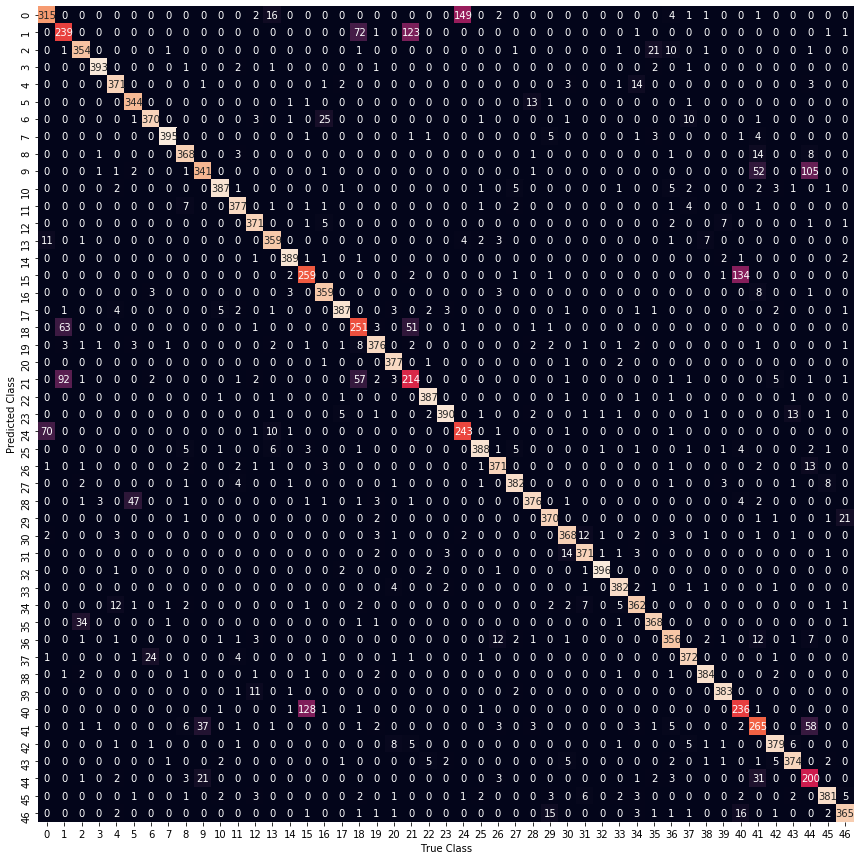

In [40]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (15,15)
mat=confusion_matrix(actual,predicted)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()